## Supply Chain Shipment Price Data Analysis
---

Exploratory data analysis has been performed using Python - Pandas, Matplotlib and Seaborn libraries.

### Importing Python libraries
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
%matplotlib inline

### Importing data and checking the summary of data
---

In [2]:
df = pd.read_csv('SCM.csv')
df.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7879 entries, 0 to 7878
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  7879 non-null   object 
 1   PQ #                          7879 non-null   object 
 2   PO / SO #                     7879 non-null   object 
 3   ASN/DN #                      7879 non-null   object 
 4   Country                       7879 non-null   object 
 5   Managed By                    7879 non-null   object 
 6   Fulfill Via                   7879 non-null   object 
 7   Vendor INCO Term              7879 non-null   object 
 8   Shipment Mode                 7619 non-null   object 
 9   PQ First Sent to Client Date  7879 non-null   object 
 10  PO Sent to Vendor Date        7879 non-null   object 
 11  Scheduled Delivery Date       7879 non-null   object 
 12  Delivered to Client Date      7879 non-null   object 
 13  Del

### Data Cleaning
---

**Dropping columns which are not required for the analysis**

In [4]:
df.drop(['Item Description','Molecule/Test Type'],axis=1,inplace=True)

In [5]:
#shape of df
df.shape

(7879, 30)

In [6]:
df.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Brand', 'Dosage', 'Dosage Form',
       'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

**Filtering out data and updating df**

In [7]:
df = df[df['Weight (Kilograms)'] != "Weight Captured Separately"]
df[df['Weight (Kilograms)'] == "Weight Captured Separately"].shape

(0, 30)

In [8]:
df = df[df['Freight Cost (USD)'] != "Invoiced Separately"]
df[df['Freight Cost (USD)'] == "Invoiced Separately"].shape

(0, 30)

In [9]:
df = df[df['Freight Cost (USD)'] != "Freight Included in Commodity Cost"]
df[df['Freight Cost (USD)'] == "Freight Included in Commodity Cost"].shape

(0, 30)

In [10]:
#shape of df after filtering
df.shape

(6175, 30)

**Changing datatypes of Weight (Kilograms), Freight Cost (USD)**

In [11]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'])
df['Freight Cost (USD)'] =pd.to_numeric(df['Freight Cost (USD)'])

In [12]:
df[['Weight (Kilograms)','Freight Cost (USD)']].dtypes

Weight (Kilograms)      int64
Freight Cost (USD)    float64
dtype: object

**Handling date columns**

In [13]:
df[['PQ First Sent to Client Date', 'PO Sent to Vendor Date',
    'Scheduled Delivery Date', 'Delivered to Client Date',
    'Delivery Recorded Date']]

,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date
0,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06
1,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06
2,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06
3,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06
4,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06
...,...,...,...,...,...
7871,10/17/2014,N/A - From RDC,29-May-15,9-Jun-15,15-Jun-15
7872,8/21/2014,N/A - From RDC,29-May-15,15-Jun-15,15-Jun-15
7873,11/3/2014,N/A - From RDC,30-Jun-15,4-Jun-15,15-Jun-15
7874,9/19/2014,N/A - From RDC,30-Jun-15,15-May-15,22-May-15


In [14]:
df['PQ First Sent to Client Date'].value_counts()

Pre-PQ Process       1415
Date Not Captured     144
3/10/2011              79
3/18/2010              76
8/31/2010              58
                     ... 
9/3/2013                1
6/4/2013                1
4/5/2010                1
8/9/2011                1
2/2/2012                1
Name: PQ First Sent to Client Date, Length: 718, dtype: int64

In [15]:
df['PO Sent to Vendor Date'].value_counts()

N/A - From RDC       3193
3/19/2010              76
Date Not Captured      73
9/24/2010              42
3/24/2011              32
                     ... 
6/5/2009                1
3/17/2013               1
4/10/2014               1
6/21/2012               1
8/29/2012               1
Name: PO Sent to Vendor Date, Length: 804, dtype: int64

In [16]:
df[df['PO Sent to Vendor Date']=="N/A - From RDC"][['PQ First Sent to Client Date','PO Sent to Vendor Date']]

,PQ First Sent to Client Date,PO Sent to Vendor Date
927,Pre-PQ Process,N/A - From RDC
928,Pre-PQ Process,N/A - From RDC
929,Pre-PQ Process,N/A - From RDC
930,Pre-PQ Process,N/A - From RDC
931,Pre-PQ Process,N/A - From RDC
...,...,...
7871,10/17/2014,N/A - From RDC
7872,8/21/2014,N/A - From RDC
7873,11/3/2014,N/A - From RDC
7874,9/19/2014,N/A - From RDC


* Columns '**PQ First Sent to Client Date**' have values '**Pre-PQ Process**' and '**Date Not Captured**'.s 
* Column '**PO Sent to Vendor Date**' have values '**N/A - From RDC**' and '**Date Not Captured**'.

**Changing datatype of the columns to date**

In [17]:
df[[ 'Scheduled Delivery Date', 'Delivered to Client Date',
    'Delivery Recorded Date']].dtypes

Scheduled Delivery Date     object
Delivered to Client Date    object
Delivery Recorded Date      object
dtype: object

In [18]:
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date']) 
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date']) 
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date']) 

In [19]:
df[[ 'Scheduled Delivery Date', 'Delivered to Client Date',
    'Delivery Recorded Date']].dtypes

Scheduled Delivery Date     datetime64[ns]
Delivered to Client Date    datetime64[ns]
Delivery Recorded Date      datetime64[ns]
dtype: object

### Data Analysis
---

**Total Orders, Orderlines, Projects and Freight Cost**

In [20]:
orders = df['PO / SO #'].nunique()
print('Total no. of orders:',orders);

orderlines = df['PO / SO #'].count()
print('Total no. of orderlines:',orderlines);

projects = df['Project Code'].nunique()
print('Total no. of projects:',projects);

total_freight = df['Freight Cost (USD)'].sum()
print('Total freight cost: $',total_freight)

Total no. of orders: 5572
Total no. of orderlines: 6175
Total no. of projects: 130
Total freight cost: $ 68687760.27


**Total Freight Cost (USD) based on Country**

In [21]:
country_summary = df.groupby('Country').sum().reset_index()
country_summary = country_summary[['Country','Freight Cost (USD)']]
country_summary.head()

,Country,Freight Cost (USD)
0,Afghanistan,1081.05
1,Angola,32796.70
2,Benin,66015.17
3,Botswana,137930.17
4,Burundi,312042.32


**Top 3 Countries based on Freight Cost (USD)**

In [22]:
country_summary.nlargest(3,'Freight Cost (USD)')

,Country,Freight Cost (USD)
23,Nigeria,14227197.64
36,Zambia,6309186.49
7,Côte d'Ivoire,6092165.51


**Bottom 3 Countries based on Freight Cost (USD)**

In [23]:
country_summary.nsmallest(3,'Freight Cost (USD)')

,Country,Freight Cost (USD)
0,Afghanistan,1081.05
26,Senegal,1444.63
12,Guinea,1804.20


**Total Freight Cost (USD) based on Country and Shipment Mode**

In [24]:
country_summary = df.groupby(['Country','Shipment Mode']).sum().reset_index()
country_summary = country_summary[['Country','Shipment Mode','Freight Cost (USD)']]
country_summary

,Country,Shipment Mode,Freight Cost (USD)
0,Afghanistan,Air,1081.05
1,Angola,Air,30832.07
2,Angola,Truck,1964.63
3,Benin,Air,66015.17
4,Botswana,Air,133841.79
...,...,...,...
71,Zambia,Truck,2712772.79
72,Zimbabwe,Air,1534030.08
73,Zimbabwe,Air Charter,527163.62
74,Zimbabwe,Ocean,63459.07


**Total Freight Cost (USD) based on Country and Shipment Mode along with count of orders**

In [25]:
country_summary = df.groupby(['Country','Shipment Mode']).agg({'PO / SO #' : 'count','Freight Cost (USD)':'sum'}).reset_index()
country_summary

,Country,Shipment Mode,PO / SO #,Freight Cost (USD)
0,Afghanistan,Air,2,1081.05
1,Angola,Air,5,30832.07
2,Angola,Truck,2,1964.63
3,Benin,Air,7,66015.17
4,Botswana,Air,58,133841.79
...,...,...,...,...
71,Zambia,Truck,263,2712772.79
72,Zimbabwe,Air,98,1534030.08
73,Zimbabwe,Air Charter,17,527163.62
74,Zimbabwe,Ocean,3,63459.07


**Total Freight Cost (USD) based on Country and Shipment Mode along with count of orders and cost of each order**

In [26]:
country_summary['Freight_cost_per_order'] = country_summary['Freight Cost (USD)']/country_summary['PO / SO #']
country_summary

,Country,Shipment Mode,PO / SO #,Freight Cost (USD),Freight_cost_per_order
0,Afghanistan,Air,2,1081.05,540.525000
1,Angola,Air,5,30832.07,6166.414000
2,Angola,Truck,2,1964.63,982.315000
3,Benin,Air,7,66015.17,9430.738571
4,Botswana,Air,58,133841.79,2307.617069
...,...,...,...,...,...
71,Zambia,Truck,263,2712772.79,10314.725437
72,Zimbabwe,Air,98,1534030.08,15653.368163
73,Zimbabwe,Air Charter,17,527163.62,31009.624706
74,Zimbabwe,Ocean,3,63459.07,21153.023333


**Freight Cost (USD) based on Shipment Mode**

In [27]:
df.groupby('Shipment Mode')['Freight Cost (USD)'].sum().reset_index().sort_values('Freight Cost (USD)',ascending=False)

,Shipment Mode,Freight Cost (USD)
0,Air,42964234.41
3,Truck,11851340.93
1,Air Charter,8884755.73
2,Ocean,3590728.79


**Freight Cost (USD) by Manufacturing Site**

In [28]:
mf_summary = df.groupby('Manufacturing Site').count().reset_index()
mf_summary[['Manufacturing Site','Freight Cost (USD)']]

,Manufacturing Site,Freight Cost (USD)
0,ABBVIE (Abbott) France,6
1,ABBVIE (Abbott) Logis. UK,125
2,ABBVIE (Abbott) St. P'burg USA,2
3,ABBVIE GmbH & Co.KG Wiesbaden,34
4,ABBVIE Ludwigshafen Germany,277
...,...,...
70,"Standard Diagnostics, Korea",102
71,"Strides, Bangalore, India.",320
72,"Trinity Biotech, Plc",305
73,"Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸n...",1


**Top 5 Manufacturing Site by Freight Cost (USD)**

In [29]:
mf_summary[['Manufacturing Site','Freight Cost (USD)']].nlargest(5,'Freight Cost (USD)')

,Manufacturing Site,Freight Cost (USD)
8,"Aurobindo Unit III, India",1691
52,Mylan (formerly Matrix) Nashik,895
29,Hetero Unit III Hyderabad IN,484
16,"Cipla, Goa, India",382
6,"Alere Medical Co., Ltd.",360


**Total Freight Cost (USD) based on Manufacturing Site and count of orders**

In [30]:
mf_summary = df.groupby('Manufacturing Site').agg({'PO / SO #':'count','Freight Cost (USD)':'sum'}).reset_index()
mf_summary

,Manufacturing Site,PO / SO #,Freight Cost (USD)
0,ABBVIE (Abbott) France,6,29262.03
1,ABBVIE (Abbott) Logis. UK,125,938805.39
2,ABBVIE (Abbott) St. P'burg USA,2,7952.82
3,ABBVIE GmbH & Co.KG Wiesbaden,34,119679.70
4,ABBVIE Ludwigshafen Germany,277,1773632.59
...,...,...,...
70,"Standard Diagnostics, Korea",102,1212535.16
71,"Strides, Bangalore, India.",320,3738725.17
72,"Trinity Biotech, Plc",305,2459749.51
73,"Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸n...",1,399.18


### Data Visualization and Analysis
---

**Freight Cost per order by Country**

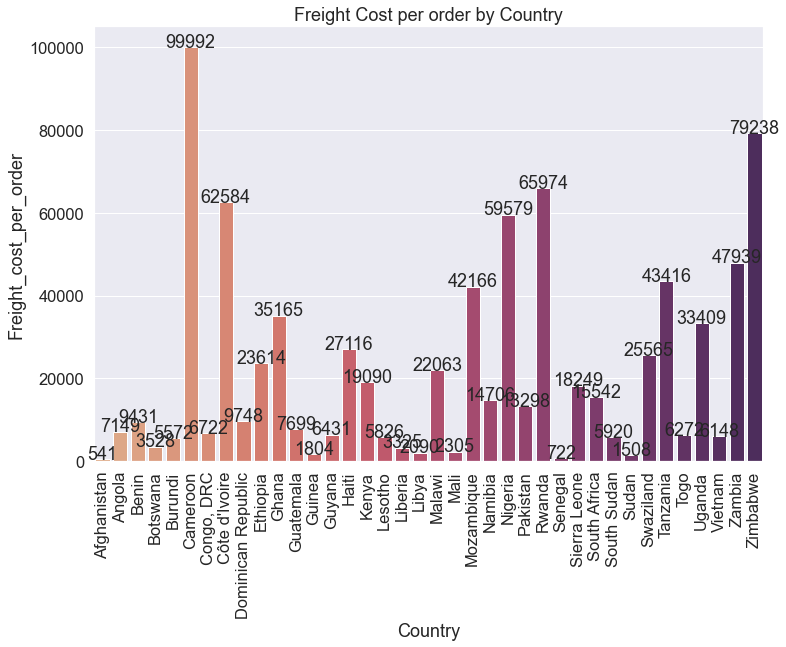

In [31]:
plt.figure(figsize=(12,8))

sns.set(font_scale = 1.5, palette = 'dark')

axes = sns.barplot(data=country_summary,x='Country',y='Freight_cost_per_order',ci=None,estimator=sum, palette='flare')
plt.title('Freight Cost per order by Country')

for p in axes.patches:
    ht = p.get_height()
    axes.text(x=p.get_x()+(p.get_width()/2),
             y=ht+10,
             ha='center',
             s='{:.0f}'.format(ht))
    
plt.xticks(rotation='vertical')
plt.show()

**Freight Cost per order by Shipment Mode**

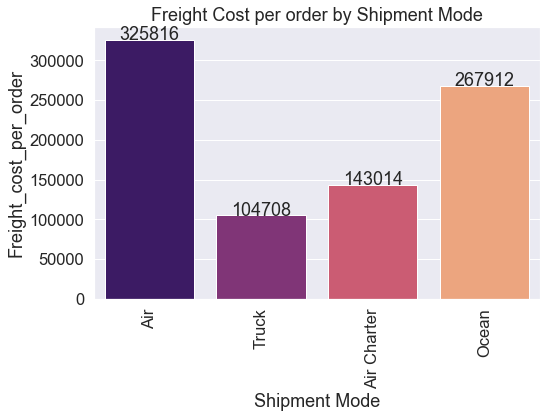

In [32]:
plt.figure(figsize=(8,5))

sns.set(font_scale = 1.5, palette = 'dark')

axes = sns.barplot(data=country_summary,
                   x='Shipment Mode',
                   y='Freight_cost_per_order',ci=None,estimator=sum,
                  palette='magma')
plt.title('Freight Cost per order by Shipment Mode')

for p in axes.patches:
    ht = p.get_height()
    axes.text(x=p.get_x()+(p.get_width()/2),
             y=ht+10,
             ha='center',
             s='{:.0f}'.format(ht))
    
plt.xticks(rotation='vertical')
plt.show()         

**Top 10 Countries by total Freight Cost (USD)**

In [33]:
totalfreight = df.groupby('Country')['Freight Cost (USD)'].sum().nlargest(10).reset_index()
totalfreight

,Country,Freight Cost (USD)
0,Nigeria,14227197.64
1,Zambia,6309186.49
2,Côte d'Ivoire,6092165.51
3,Rwanda,5890687.72
4,Uganda,5484292.24
5,Tanzania,4812951.90
6,Zimbabwe,4318000.86
7,Haiti,3999521.29
8,Mozambique,3277455.32
9,Vietnam,2735875.80


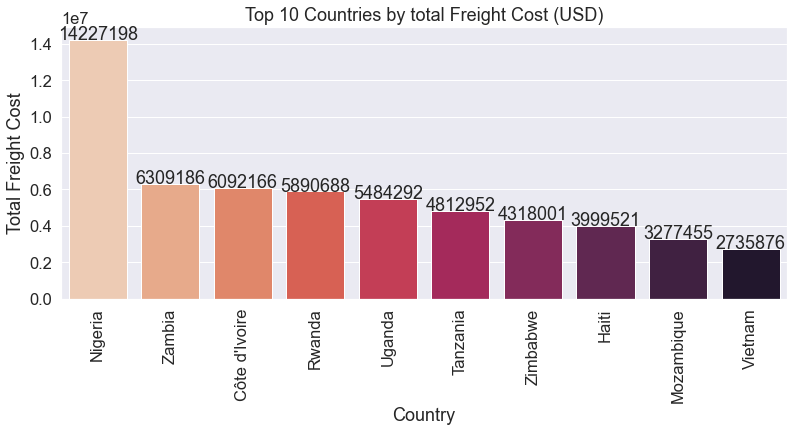

In [34]:
plt.figure(figsize=(13,5))

axes = sns.barplot(x='Country',
                  y='Freight Cost (USD)',
                   data=totalfreight,palette='rocket_r')
plt.title('Top 10 Countries by total Freight Cost (USD)')


for p in axes.patches:
    ht = p.get_height()
    axes.text(x=p.get_x()+(p.get_width()/2),
             y=ht+10,
             ha='center',
             s="{:.0f}".format(ht))

plt.xlabel('Country')
plt.ylabel('Total Freight Cost')

plt.xticks(rotation='vertical')
plt.show()   

**Top 10 Manufacturing Site by Freight Cost (USD)**

In [35]:
top_10_mf_site_by_fc = mf_summary[['Manufacturing Site','Freight Cost (USD)']].nlargest(10,'Freight Cost (USD)')
top_10_mf_site_by_fc

,Manufacturing Site,Freight Cost (USD)
8,"Aurobindo Unit III, India",16158534.80
52,Mylan (formerly Matrix) Nashik,11568067.44
6,"Alere Medical Co., Ltd.",7109931.22
29,Hetero Unit III Hyderabad IN,6898490.39
16,"Cipla, Goa, India",4754497.47
71,"Strides, Bangalore, India.",3738725.17
34,Inverness Japan,2989536.93
72,"Trinity Biotech, Plc",2459749.51
39,"KHB Test Kit Facility, Shanghai China",2383953.19
4,ABBVIE Ludwigshafen Germany,1773632.59


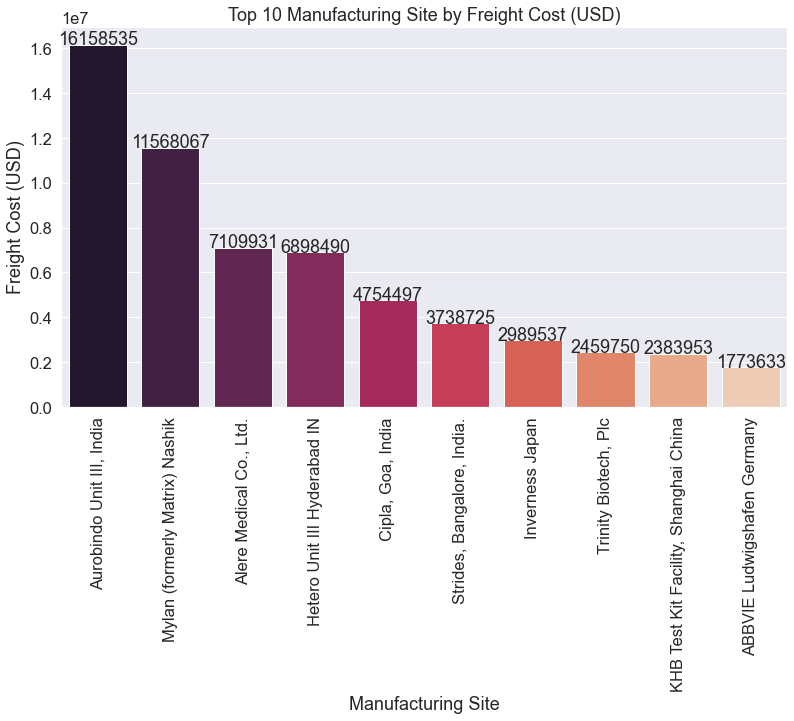

In [36]:
plt.figure(figsize=(13,7))

axes = sns.barplot(data= top_10_mf_site_by_fc, 
            x='Manufacturing Site',
            y='Freight Cost (USD)',
                  palette='rocket')

for p in axes.patches:
    ht = p.get_height()
    axes.text(x=p.get_x()+(p.get_width()/2),
             y=ht+10,
             ha='center',
             s="{:.0f}".format(ht))
    
plt.title('Top 10 Manufacturing Site by Freight Cost (USD)')
plt.xlabel('Manufacturing Site')
plt.xticks(rotation='vertical')
plt.show()   

---